# Markov Chains

## Overview

Markov chains are one of the most fundamental classes of stochastic processes

Attributes

1. simple, flexible and supported by many elegant theoretical results
2. valuable for building intuition about random dynamic models
3. very useful in their own right

Reference

    1. Thomas J. Sargent and John Stachurski, http://quant-econ.net
    2. Richard Weber, http://www.statslab.cam.ac.uk/~rrw1/markov
    3. Eugenia Stoimenova, http://www.math.bas.bg/~jeni/
    4. http://www.tcs.hut.fi/Studies
    5. http://steep.inrialpes.fr/~Arnaud
    6. http://www.philol.msu.ru/~lex/khmelev/published/llc/khmelev.html
    7. 李中傑, 棒球比賽宛如是一個馬可夫過程, 真理大學


In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo("AiAHlZVgXjk")

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo("jIKJUIFkTro")

In [2]:
import numpy as np
import scipy as sp
from scipy.linalg import eig
from numpy import cumsum
from numpy.random import uniform
from IPython.display import HTML

In [21]:
def printP(P):
    l='<div align="center"><table>';
    row=len(P[:,0])
    i=j=k=0;
    l=l+"<tr><td>State</td>"
    for k in range(row):
          k1=k+1
          l=l+'<td><div align="center">%s</div></td>' % (k1)
          k++1  
    for i in range(1,row+1):
        l=l+'<tr><td><div align="center">%s</div></td>' %i
        for j in range(1,row+1):
            l=l+"<td> %1.4f </td>" %(P[i-1,j-1]);
            j++1
        l=l+"</tr>"
        i++1
    l=l+"</table></div>"
    return HTML(l)

In [3]:
def printP2(P,states):
    """
    printP2(P,states):
      input: P, transition probability matrix,
          states, array of all states
      output: well-formated HTML table for the transition Probability matrix       
    """
    #if states:
    #    states=np.arange(size(P[0,]))
    l='<div align="center"><table>';
    row=len(P[:,0])
    i=j=k=0;
    l=l+"<tr><td>State</td>";
    #for n in arange(size(states)):
        
    for k in range(row):
          l=l+'<td><div align="center">%s</div></td>' % (states[k])
          k++1
    l=l+'</tr>';        
    for i in range(1,row+1):
        l=l+'<tr><td><div align="center">%s</div></td>' %states[i-1]
        for j in range(1,row+1):
            l=l+"<td> %1.4f </td>" %P[i-1,j-1];
            j++1
        l=l+"</tr>"
        i++1
    l=l+"</table></div>"
    return HTML(l)

In [4]:
def StableDist(P):
    """
    StableDist(P)
      input: P, transition probability matrix,
      output: stable distribution 
    """
    evals, evecs = sp.linalg.eig(P,left=True,right=False)
    eps=1e-6
    ind=evals[:]>1.-eps
    p0=np.transpose(evecs[:,ind]/sum(evecs[:,ind]))
    return p0

## Markov and Markov Chains

Markov chains have been introduced by the Russian mathematician Andrei Andreyevich Markov in the early 1900s.



## Introduction

<div class="alert alert-success" align="center">
    The system is `evolving` randomly in time
</div>


A system at time $t=0,1,2,\cdots$
The system can be in one state of a collection of possible states, e.g. **$S$={Happy,So-so,Blue}**
The observation of the system is considered as an experience whose (random) result is the state’s system, so called stochastic process.



## Definition

A discrete time **markov chain** is a stochastic process modeling a sequence of random variables within a system. The likelihood of the next random variable in the sequence only depends on the current state. 




Formally, given a sequence of events $X_0,X_1,... X_n$ the probability of transitioning to state $i_n$ can be written as:

$$P\left\{X_n=i_n| X_0=i_0,...,X_{n-1}=i_{n-1}\right\} = P\left\{X_n=i_n | X_{n-1}=i_{n-1} \right\}$$

A stochastic matrix describes the dynamics of a Markov chain $\{X_n\}$ that takes values in the state space $S$.

Formally, we say that a discrete time stochastic process $\{X_n\}$ taking values in S is a Markov chain with stochastic matrix $P$ (called **transtition matrix**) if 
$$   {\cal P}\{X_{n+1}=j|X_n=i\}=P[i,j] $$

for any $t\ge0$ and $i,j\in S$; here $\cal P$ means probability.


## examples :

    – state of an engine (working, not working)
    – weather (rain, cloud, snow, sun)
    – robot’s position on a grid
<p>
<div class="alert alert-success" align="center">
    What kind of experience do you have about Markov property? 
</div>


## Stochastic Matrices

A stochastic matrix (or Markov matrix) is an n×n square matrix $P=P[i,j]$ such that

each element $P[i,j]$ is nonnegative, and each row $P[i,⋅]$ sums to one

Let $S:=0,\cdots,n$

Evidently, each row $P[i,⋅]$ can be regarded as a distribution (probability mass function) on $S$.

## Example (Drunkard walk)

A random walk on the number line where, at each step, the position may change by +1 or −1 with equal probability.


```           
                     p   O    p
                        /|\
                   <--- / \ --->             
         ----------|-----|-----|----|---------
                  n-1    n    n+1
```

From any position there are two possible transitions, to the next or previous integer. The transition probabilities depend only on the current position, not on the manner in which the position was reached. For example, the transition probabilities from 5 to 4 and 5 to 6 are both 0.5, and all other transition probabilities from 5 are 0. These probabilities are independent of whether the system was previously in 4 or 6.

Suppose the the drunk man will fall down valley if he go 10 steps straightly toward east. And his first step is toward east and never go west if he is back to the intial position.


Transition Matrix of The position
---
The transition probability from state $i$ to state $j$, $p_{i,j}$:
$$P=(p_{ij}),0\le i,j\le10$$

In [8]:
P=np.zeros((11,11))
P=np.matrix(P)
P[0,1]=P[10,10]=1.
for i in np.arange(1,10):
    P[i,i-1]=P[i,i+1]=1/2.
P    

matrix([[ 0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0.5,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0.5,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0.5,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0.5,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  0.5,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  0.5,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  0.5,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  0.5],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ]])

In [9]:
n=np.arange(np.size(P[0,]))
printP2(P,n)

State,0,1,2,3,4,5,6,7,8,9,10
0,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.5000,0.0000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.5000,0.0000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.5000,0.0000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.5000,0.0000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,0.0000,0.5000,0.0000,0.5000,0.0000,0.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,0.0000,0.5000,0.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,0.0000,0.5000,0.0000,0.0000
8,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,0.0000,0.5000,0.0000
9,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,0.0000,0.5000


What is his position after 20 steps?
---



Just $P^{20}=(p_{i,j}^{20})$ where 
$$p_{i,j}^{20}=\text{Probability of entering state }j\text{ after moving 20 steps randomly and starting from }i\text{ state.}$$ 

In [6]:
printP2(P**20,n)

State,0,1,2,3,4,5,6,7,8,9,10
0,0.1762,0.0000,0.3203,0.0000,0.2399,0.0000,0.1457,0.0000,0.0647,0.0000,0.0532
1,0.0000,0.3364,0.0000,0.2801,0.0000,0.1928,0.0000,0.1052,0.0000,0.0323,0.0532
2,0.1602,0.0000,0.2961,0.0000,0.2330,0.0000,0.1523,0.0000,0.0728,0.0000,0.0856
3,0.0000,0.2801,0.0000,0.2490,0.0000,0.1925,0.0000,0.1200,0.0000,0.0405,0.1179
4,0.1200,0.0000,0.2330,0.0000,0.2085,0.0000,0.1602,0.0000,0.0876,0.0000,0.1907
5,0.0000,0.1928,0.0000,0.1925,0.0000,0.1762,0.0000,0.1278,0.0000,0.0471,0.2636
6,0.0728,0.0000,0.1523,0.0000,0.1602,0.0000,0.1439,0.0000,0.0873,0.0000,0.3835
7,0.0000,0.1052,0.0000,0.1200,0.0000,0.1278,0.0000,0.1034,0.0000,0.0402,0.5035
8,0.0323,0.0000,0.0728,0.0000,0.0876,0.0000,0.0873,0.0000,0.0562,0.0000,0.6636
9,0.0000,0.0323,0.0000,0.0405,0.0000,0.0471,0.0000,0.0402,0.0000,0.0160,0.8238


Okay, what happens eventually?
---

Suppose that he always walk left and right if not falling down the valley.

In [9]:
printP2(P**100,n)

State,0,1,2,3,4,5,6,7,8,9,10
0,0.0579,0.0000,0.1102,0.0000,0.0938,0.0000,0.0681,0.0000,0.0358,0.0000,0.6341
1,0.0000,0.1131,0.0000,0.1020,0.0000,0.0809,0.0000,0.0520,0.0000,0.0179,0.6341
2,0.0551,0.0000,0.1048,0.0000,0.0892,0.0000,0.0648,0.0000,0.0341,0.0000,0.6521
3,0.0000,0.1020,0.0000,0.0920,0.0000,0.0730,0.0000,0.0469,0.0000,0.0162,0.6700
4,0.0469,0.0000,0.0892,0.0000,0.0759,0.0000,0.0551,0.0000,0.0290,0.0000,0.7040
5,0.0000,0.0809,0.0000,0.0730,0.0000,0.0579,0.0000,0.0372,0.0000,0.0128,0.7381
6,0.0341,0.0000,0.0648,0.0000,0.0551,0.0000,0.0400,0.0000,0.0211,0.0000,0.7850
7,0.0000,0.0520,0.0000,0.0469,0.0000,0.0372,0.0000,0.0239,0.0000,0.0082,0.8318
8,0.0179,0.0000,0.0341,0.0000,0.0290,0.0000,0.0211,0.0000,0.0111,0.0000,0.8869
9,0.0000,0.0179,0.0000,0.0162,0.0000,0.0128,0.0000,0.0082,0.0000,0.0028,0.9421


What happens at the even rows, in which there are 5 transtion probabilities are zero?
---

In [15]:
printP2(P**1001,n)

State,0,1,2,3,4,5,6,7,8,9,10
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
8,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
9,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


## Discussions

 
- Eventually, the drunkard would fall down the valley. But why?

Roughtly, we can make the folloing simple conclusion
```
   Once he falled down the valley, says at 1001 step here, he never move again!
```   

In [17]:
stableS=StableDist(P)
stableS

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [18]:
stableS*P

matrix([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

## Question:

What's your conclusion about the last two results?

## Note:
Numpy provides two kinds of data type to store vector/matrix data, **array() and matrix()**. However, there are some differences between these types, especially the algebraic calculation.

<h3> Drunkard Example again</h3>
Suppose that the state "0"  also represents falling valley. Reconsider the example again.

In [10]:
P2=P
P2[0,0]=1.;P2[0,1]=0.;
printP2(P2,n)

State,0,1,2,3,4,5,6,7,8,9,10
0,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.5000,0.0000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.5000,0.0000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.5000,0.0000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.5000,0.0000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,0.0000,0.5000,0.0000,0.5000,0.0000,0.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,0.0000,0.5000,0.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,0.0000,0.5000,0.0000,0.0000
8,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,0.0000,0.5000,0.0000
9,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,0.0000,0.5000


In [11]:
printP2(P2**1000,n)

State,0,1,2,3,4,5,6,7,8,9,10
0,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1000
2,0.8000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2000
3,0.7000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3000
4,0.6000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4000
5,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000
6,0.4000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6000
7,0.3000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7000
8,0.2000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8000
9,0.1000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9000


In [13]:
printP2(P2**1001,n)

State,0,1,2,3,4,5,6,7,8,9,10
0,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1000
2,0.8000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2000
3,0.7000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3000
4,0.6000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4000
5,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000
6,0.4000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6000
7,0.3000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7000
8,0.2000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8000
9,0.1000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9000


In [14]:
StableDist(P)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

Question
---
What the situation does the drunkard still alive? Why?

<h3> Note: Difference between Array and Matrix Operations</h3>
Matrices can be treated as a 2D values (data). However, matrix operations are different from general value arithmatic operations.  For instance:
$ M\times M=0$ does not imply $M=0$ for matrix $M$. 

In [13]:
A=np.array([[1,-1],[1,-1]])
B=np.matrix(A)
A,B

(array([[ 1, -1],
        [ 1, -1]]), matrix([[ 1, -1],
         [ 1, -1]]))

In [14]:
printP(A*A)

State,1,2
1,1.0000,1.0000
2,1.0000,1.0000


In [15]:
printP(B*B)

State,1,2
1,0.0000,0.0000
2,0.0000,0.0000


## Example (Learning Or Not)

Arnorld, a student in the class, would be in one of four states:

    1. learning
    2. watch his facebook,
    3. write exercise or lab report,
    4. dozing off.

Every ten minutes, Arnold can change his activity or continue the current one. Suppose that the behavior of Arnold's changing state is a process without memory.

    - When he dozes off, there is 9 chances over 10 that he will not wake up the next ten minute, otherwise 1 chance over 10 that he will wake up and listen what he had lost.
    - When he wakes up, there is 1 chance over 3 that listens lecture, and 1 chance over 3 that logins his facebook, and 1 chance over 3 that will write lab report;
    - when teacher ask to him shutdown his cell phone, there is 3 chances over 5 that he will fall in asleep, and 2 chances over 5 that he will write his lab report.
    - when teacher stop his writing staff, there is 1 chances over 4 that he will attend the lecture listening, and 1 chances over 2 that he will doze off.



# Example (continued)

**State $S$**: 1 for listening, 2 for using cell phone, 3 for writing, and 4 for dozzling.

**The first state**: 1

**Question**: After ten minutes, in what state is Arnold we can predict? How about 20 minutes? and so on?


## Answer (continued)

After ten minutes,

1. $1\to1$ (still listening to the lecture): 1/3
2. $1\to2$: 1/3
3. $1\to3$: 1/3
4. $1\to4$: 0




<div class="alert alert-success" align="center">
    The case becomes more `complicated` while time elapses!

</div>


The probability transtion matrix would do much help!

In [16]:
P1=np.matrix([[1/3.,1/3.,1/3.,0],[0,0,2/5.,3/5.],[1/4.,1/4.,0,1/2.],[1/10.,0,0,9/10.]])

In [17]:
printP(P1)

State,1,2,3,4
1,0.3333,0.3333,0.3333,0.0000
2,0.0000,0.0000,0.4000,0.6000
3,0.2500,0.2500,0.0000,0.5000
4,0.1000,0.0000,0.0000,0.9000


## Example (continued)

After the first result, the transition states from any state could be any state in $S$; the following calculation shows the probability, staring from state 1 to any states and back to state again:
$$
1 \to [1,2,3,4] \to 1\\
   P(X_2=1|X_0=1)=\sum_{i\in S}P(X_1=i|X_0=1)\times P(X_2=1|X_1=i)
$$

Above result describes the case that Arnold still awake and keeps on listening after two time units elapsed.

<h3>Symbols</h3>

$P(X_{n+1}=j|X_n=i)$: the probability of being in $i$-state at time $n+1$ given by condition which is in state $i$ at time $n$. 

## Question:

1. Does this mean that the person always awakes at the first twenty minutes?
2. How many changes does this person awake and listen to the lectecure during two hours? (very hard)

<h2>Note</h2>
$$P(X_2=1|X_0=1)= \sum_i P(X_2=1|X_1=i)P(X_1=i|X_0=1)=\sum_i P(X_1=1|X_0=i)P(X_1=i|X_0=1)=P^2[1,1]$$

In [18]:
printP(P1**2)

State,1,2,3,4
1,0.1944,0.1944,0.2444,0.3667
2,0.1600,0.1000,0.0000,0.7400
3,0.1333,0.0833,0.1833,0.6000
4,0.1233,0.0333,0.0333,0.8100


<div class="alert alert-success" align="center">
<b>Answer for last question<b>: Only about <code>2</code> chances over 10, he is still listening after 20 minutes.
</div>

In [27]:
StableDist(P1)

array([[ 0.13602015,  0.06297229,  0.07052897,  0.73047859]])

In [69]:
printP(P1**10)

State,1,2,3,4
1,0.1361,0.0632,0.0708,0.7300
2,0.1360,0.0630,0.0705,0.7305
3,0.1360,0.0630,0.0706,0.7303
4,0.1360,0.0629,0.0705,0.7306


In [70]:
printP(P1**100)

State,1,2,3,4
1,0.1360,0.0630,0.0705,0.7305
2,0.1360,0.0630,0.0705,0.7305
3,0.1360,0.0630,0.0705,0.7305
4,0.1360,0.0630,0.0705,0.7305


<div class="alert alert-success" align="center">
How about the last two computed results? 
</div>

## Observation

While at the (large) $n$ step, the transtion probability seems to be distributed as constant as follows:

$$\pi_n=(p_1,p_2,p_3,p_4)^{t=n}$$

Then the transtion probability to the next step should be

1. state 1: $p_1*p_{11}+p_2*p_{21}+p_3*p_{31}+p_4*p_{41}(\sim p_1)$
$$   
   P(X_{n+1}=1) = P(X_n=1) P(X_{n+1}=1|X_n=1)+P(X_n=2) P(X_{n+1}=1|X_n=2)+\cdots+P(X_n=4) P(X_{n+1}=1|X_n=4) 
$$
2. states $i=2,3,4$: $p_1*p_{1i}+p_2*p_{2i}+p_3*p_{3i}+p_4*p_{4i}(\sim p_i)$
3. $$ (p_1,p_2,p_3,p_4)^{n+1}=(p_1,p_2,p_3,p_4)^{n}\times P$$

This implies: $$ \pi_{n+1}=\pi_n\times P$$ if time $n$ is large enough (eventually). This is stable if the following exists:
$$\pi=\lim_{n\to\infty}\pi_{n+1}=\lim_{n\to\infty}\pi_n\times P=\pi P$$


## Tools for evaluate stable $\pi$

Although $\pi$ is calculated by matrix theory, NumPy/SciPy is the best choice for computing Linear Algebra and for computing transition matix!


## Mathematical Background

**Definition**

An $n×k$ matrix is a rectangular array $A$ of numbers with $n$ rows and $k$ columns:

\begin{split}A = \left[ \begin{array}{cccc} a_{11} & a_{12} & \cdots & a_{1k} \\ a_{21} & a_{22} & \cdots & a_{2k} \\ \vdots & \vdots & & \vdots \\ a_{n1} & a_{n2} & \cdots & a_{nk} \end{array} \right]\end{split}

$A$ is called square matrix if $n=k$.

**Definition**
---
Let $P$ be an $n×n$ square matrix

**a).** If $\lambda$ is scalar and $\vec v$ is a non-zero vector in $\mathbb{R}^n$ such that 
$$\mathbb{P\vec v=\lambda \vec v},$$
then we say that $\lambda$ is a **right eigenvalue** of $P$, and $\vec v$ is a **right eigenvector**.

**b).** If $\lambda$ is scalar and $\vec v$ is a non-zero vector in $\mathbb{R}^n$ such that 
$$\mathbb{\vec v P=\lambda \vec v},$$
then we say that $\lambda$ is a **left eigenvalue **of $P$, and $\vec v$ is a **left eigenvector**



<div class="alert alert-success" align="center">
<big>Left {*eigenvalues*, *eigenvectors*} is the key point to describe the stable property for $P$.</big>
</div>

**Theorem**
Let $P$ be an $n×n$ Transition matrix. 1 is an eigenvalue since
$$ P\cdot[1,1,\cdots,1]^t=\left[\sum_i^n p_{1i},\cdots,\sum_i^n p_{ni}\right]=[1,1,\cdots,1]^t$$




**Theorem** (Accumulated Effect)

$\vec v P=\lambda \vec v$ impies $\lambda^m$ is eigenvalue of $P^m$ with the same eigenvector:

$$\vec v P^m=(\vec v P) P^{m-1}=\lambda \vec v P^{m-1}=\lambda^2 \vec v P^{m-2}=\cdots= \lambda^m\vec v $$




**Theorem**

Every left eigenvalue $\lambda_j$ satisfies $|\lambda_j|\le1$
$$ \lambda_j^m \vec v = \sum_i^n v_i p^m_{ij} \\
   |\lambda_j^m|\cdot ||\vec v|| \le \sum_i^n |v_i| p_{ij} \\
   |\lambda_j^m|  \le \sum_i^n  p_{ij}\le C \\
$$   
This proves the theorem since the last result would holds for every $m\ge1$.

<div align="center"><big>
(If not, $\lambda^m$ should be not bounded for some $m$ large enough.)
</big>
</div>
   

## Example

**Definition**

Suppose that $P$ is a $2x2$ transition matrix, $P$, as follows:

\begin{split}P = \left[ \begin{array}{cc} p_{11} & p_{12}\\ p_{21} & p_{22} \end{array} \right]\end{split}


**Facts**

1. If $p_{12}=p_{21}=0$ $\to$ 2 recurrent states and $\lambda=1$ with multiplicity 2.
2. If $p_{12}=p_{21}=1$ $\to$ periodic and eigenvalues are 1 and $\lambda=-1$ (otherwise $|\lambda|<1$).


## Neumann's Theorem

If $∥A^k∥\lt 1$ for some $k∈\mathbb{N}$, then $I−A$ is invertible, and

\begin{split} (I - A)^{-1} = \sum_{k=0}^{\infty} A^k \end{split} where \begin{split} \| A \| := \max_{\| x \| = 1} \| A x \| \end{split}


## Properties of MC

1. A state $j$ is said to be **accessible** from a state $i$ if $ P^n(i,j)>0$ for some $n\ge0$. 
2. Periodic: A state $ i$ has **period** $k$ if any return to state $i$ must occur in multiples of $k$ time steps. If $k = 1$, then the state is said to be *aperiodic*
3. Recurrence: A state $i$ is said to be *transient* if, given that we start in state $i$, there is a non-zero probability that we will never return to $i$.  A state $i$ is said to be *recurrent* if and only if the expected number, starting from $i$, back to $i$ is infinite.
$$\text{ recurrent if } \sum_{n\ge 1}P_{i,i}^n=\infty;\\
  \text{ transient if } \sum_{n\ge 1}P_{i,i}^n<\infty;\\                       
$$
4. A state $i$ is called *absorbing* if it is impossible to leave this state.
5. Ergodicity: A state $i$ is said to be ergodic if it is aperiodic and positive recurrent. In other words, a state i is ergodic if it is recurrent, has a period of 1 and it has finite mean recurrence time. If all states in an irreducible Markov chain are ergodic, then the chain is said to be ergodic.
6. $\pi$ is called stationary if
   
$$
   \pi=[\pi_1,\cdots,\pi_n], \pi_i\ge0; \\
   \sum_{i\in S}\pi_i=1;\\
   \pi=\pi P
$$ 



## Theorem
An irreducible chain has a stationary distribution if and only if all of its states are positive recurrent, i.e.
$$ \pi=\pi P$$

## Note
An irreducible aperiod Markov chain satisfies:
$$ \pi=\pi P \\
   \to \pi(I_n-1\cdot P)=0$$
   This means $\pi$ is the eigenvector of $P$ with respect to the eigenvalue <font color="red">"$1$"</font>.   <br>  
   <img src="images/invariant.png">   


In [19]:
B=np.matrix([[0.4,0.6],[0.2,0.8]])
printP(B)

State,1,2
1,0.4000,0.6000
2,0.2000,0.8000


In [9]:
evals, evecs =sp.linalg.eig(B,left=True,right=False)

evals=np.real(evals)
evals

array([ 0.2,  1. ])

In [10]:
ev0=evecs[:,1];ev0

array([-0.31622777, -0.9486833 ])

In [11]:
ev0=ev0/sum(ev0);ev0

array([ 0.25,  0.75])

In [20]:
ev1=StableDist(B)
ev1

array([[ 0.25,  0.75]])

In [14]:
ev1*B

matrix([[ 0.25,  0.75]])

## Procedure for Evaluating $\pi$

1. Find out all the eigenvalues of $P$ with eigenvales repectively; 

2. the eigenvector with respect to eigenvale 1 is the stable distribution, $\pi$, that  we want to find.

## By SciPy

1. Find eigenvalues by <br>
   <font color="brown">eigvals,eigvecs=scipy.linalg.eig(P,left=True,right=False)</font>

2. Suppose that eigvec = eigvec[:,i] is the eigenvector with respect to eigenvalue1. It is the stable distribution, $\pi$ if eigenvec is unit vector; otherwise, $\pi$ is <font color="brown">eigvec/sum(eigvec)</font> since total sum of transition probability is equal to 1.

In [20]:
A = np.matrix([[0.7,0.2,0.1],[0,0.5,0.5],[0.,0.9,0.1]])
printP(A)

State,1,2,3
1,0.7000,0.2000,0.1000
2,0.0000,0.5000,0.5000
3,0.0000,0.9000,0.1000


In [21]:
printP(A**1000)

State,1,2,3
1,0.0000,0.6429,0.3571
2,0.0000,0.6429,0.3571
3,0.0000,0.6429,0.3571


In [16]:
printP(A**2000)

State,1,2,3
1,0.0000,0.6429,0.3571
2,0.0000,0.6429,0.3571
3,0.0000,0.6429,0.3571


In [22]:
evals, evecs =sp.linalg.eig(A,left=True,right=False)

evals=np.real(evals)
evals

array([ 0.7,  1. , -0.4])

In [24]:
ev0=evecs[:,1]
ev0

array([ 0.        ,  0.87415728,  0.48564293])

In [25]:
ev0=ev0/sum(ev0);ev0

array([ 0.        ,  0.64285714,  0.35714286])

In [36]:
eps=1e-6
ind=evals[:]>1.-eps
#evals[:,ind]
evecs[:,ind]/sum(evecs[:,ind])

array([[ 0.        ],
       [ 0.64285714],
       [ 0.35714286]])

In [26]:
StableDist(A)

array([[ 0.        ,  0.64285714,  0.35714286]])

## Frog on the 7 lily pad

A frog hops about on 7 lily pads. The numbers next to arrows show the probabilities with which, at the next jump, 
he jumps to a neighbouring lily pad (and when out-going probabilities sum to less than 1 he stays where he is with 
the remaining probability).
<p>
<img src="images/frog.png">


## Challenges

    a) Starting in state 1, what is the probability that we are still in state 1 after 3 steps?
    b) after 5 steps?
    c) after 100 steps (or eventually)?



In [17]:
P=np.matrix([[0,1,0,0,0,0,0],
             [0,1/2.,1/2.,0,0,0,0],
             [1/2.,0,1/2.,0,0,0,0],
             [0,0,1/4.,1/2.,1/4.,0,0],
             [0,0,0,0,0,1/2.,1/2.],
             [0,0,1,0,0,0,0],
             [0,0,0,0,0,0,1]])
printP(P)

State,1,2,3,4,5,6,7
1,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.5000,0.5000,0.0000,0.0000,0.0000,0.0000
3,0.5000,0.0000,0.5000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.2500,0.5000,0.2500,0.0000,0.0000
5,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,0.5000
6,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


In [17]:
printP(P*P*P)

State,1,2,3,4,5,6,7
1,0.2500,0.2500,0.5000,0.0000,0.0000,0.0000,0.0000
2,0.2500,0.3750,0.3750,0.0000,0.0000,0.0000,0.0000
3,0.1250,0.5000,0.3750,0.0000,0.0000,0.0000,0.0000
4,0.1250,0.1250,0.3125,0.1250,0.0625,0.0625,0.1875
5,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.5000
6,0.2500,0.5000,0.2500,0.0000,0.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


In [18]:
printP(P**5)

State,1,2,3,4,5,6,7
1,0.1875,0.4375,0.3750,0.0000,0.0000,0.0000,0.0000
2,0.1875,0.4062,0.4062,0.0000,0.0000,0.0000,0.0000
3,0.2188,0.3750,0.4062,0.0000,0.0000,0.0000,0.0000
4,0.1562,0.2500,0.2969,0.0312,0.0156,0.0156,0.2344
5,0.0625,0.2500,0.1875,0.0000,0.0000,0.0000,0.5000
6,0.1875,0.3750,0.4375,0.0000,0.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


In [19]:
P000=P**100
P000[0,0]

0.20000000000000001

In [19]:
printP(P**1000)

State,1,2,3,4,5,6,7
1,0.2000,0.4000,0.4000,0.0000,0.0000,0.0000,0.0000
2,0.2000,0.4000,0.4000,0.0000,0.0000,0.0000,0.0000
3,0.2000,0.4000,0.4000,0.0000,0.0000,0.0000,0.0000
4,0.1500,0.3000,0.3000,0.0000,0.0000,0.0000,0.2500
5,0.1000,0.2000,0.2000,0.0000,0.0000,0.0000,0.5000
6,0.2000,0.4000,0.4000,0.0000,0.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


## Problem

Suppose that the climate record is as follows (one-day transition):

           cloud  sun rain  snow
    cloud   0.6   0.2  0.2    0
     sun    0.7   0.3    0    0
    rain    0.55    0  0.4  0.05
    snow    0       0  0.5  0.5

What about the climate of tomorrow, and the day after tomorrow? Guess where the place locates. How to introtruce the climate information for travellers?


Problem
---

Physicians who diagnose asymptomatic gallstones are faced with the decision to either immediately remove the gall bladder to prevent possible life-threatening complications or to postpone surgery until complications do occur. What is the long-term trend of each strategy?

        A      C    R     W     D
    A  0.95  0.04   0     0    0.01 
    C   0      0   0.995  0    0.005
    R   0      0   0.09  0.90  0.01 
    W   0      0   0     0.99  0.01
    D   0      0   0      0     1 

Where the state is one of the follows:

    A (1): Asymptomatic gallstone; postpone surgery from 4-month delay with 0.95 probability;
    C (2): cholecystitis or biliary complications; will require surgery with 0.04 probability;
    D (5): natual death state; with probability 0.01 due to age
    R (3): Recovery state;
    W (4): well state; 99% well recovery and 1% to death

Ninety percent of the patients move onto the well state (W) while 9% stay in the recovery state each year and 1% die of natural causes. If the disease progresses and becomes symptomatic, then surgery is performed with a risk of death from complications due to surgery of 0.005.

a). Contruct the transition matrix, $P$.<br>
b). Is there any stationary state? What does it mean?<br>
c). What is your suggestion for a 60 years old patient in state A?<br>

# Markov Chain Model for Baseball

        
```
   Yogi Berra
   
   It's not over until it's over.
```

## RUNNERS AND OUTS COMBINATIONS
```     
      state ( xyz , outs)
      
      xyz: runners on on the bases x,y,z
      outs: number of outs
```     

Runners (on any base): 0(none) 1     2     3     12     13     23     123

         0: (0,0)[1]  (1,0)[2]  (2,0)[3]  (3,0)[4]  (12,0)[5]  (13,0)[6]  (23,0)[7]  (123,0)[8]
    Outs 1: (0,1)[9]  (1,1)[10] (2,1)[11] (3,1)[12] (12,1)[13] (13,1)[14] (23,1)[15] (123,1)[16]
         2: (0,2)[17] (1,2)[18] (2,2)[19] (3,2)[20] (12,2)[21] (13,2)[22] (23,2)[23] (123,2)[24]

 Three outs state [25]

There are 25 states considered, in other words, the transition matrix, $P$, is a $25\times25$ matrix.


## States of Markov Chain Model for Baseball

<table border="1" cellpadding="2" cellspacing="2" width="70%">
<tbody>
<tr>
<td align="center" valign="top">no.<br>
</td>
<td align="center" valign="top">state<br>
</td>
<td align="center" valign="top">no.<br>
</td>
<td align="center" valign="top">state<br>
</td>
<td align="center" valign="top">no.<br>
</td>
<td align="center" valign="top">state<br>
</td>
</tr>
<tr>
<td align="center" valign="top">1<br>
</td>
<td align="center" valign="top">(0,0)<br>
</td>
<td align="center" valign="top">9<br>
</td>
<td align="center" valign="top">(0,1)<br>
</td>
<td align="center" valign="top">17<br>
</td>
<td align="center" valign="top">(0,2)<br>
</td>
</tr>
<tr>
<td align="center" valign="top">2<br>
</td>
<td align="center" valign="top">(1,0)<br>
</td>
<td align="center" valign="top">10<br>
</td>
<td align="center" valign="top">(1,1)<br>
</td>
<td align="center" valign="top">18<br>
</td>
<td align="center" valign="top">(1,2)<br>
</td>
</tr>
<tr>
<td align="center" valign="top">3<br>
</td>
<td align="center" valign="top">(2,0)<br>
</td>
<td align="center" valign="top">11<br>
</td>
<td align="center" valign="top">(2,1)<br>
</td>
<td align="center" valign="top">19<br>
</td>
<td align="center" valign="top">(2,2)<br>
</td>
</tr>
<tr>
<td align="center" valign="top">4<br>
</td>
<td align="center" valign="top">(3,0)<br>
</td>
<td align="center" valign="top">12<br>
</td>
<td align="center" valign="top">(3,1)<br>
</td>
<td align="center" valign="top">20<br>
</td>
<td align="center" valign="top">(3,2)<br>
</td>
</tr>
<tr>
<td align="center" valign="top">5<br>
</td>
<td align="center" valign="top">(12,0)<br>
</td>
<td align="center" valign="top">13<br>
</td>
<td align="center" valign="top">(12,1)<br>
</td>
<td align="center" valign="top">21<br>
</td>
<td align="center" valign="top">(12,2)<br>
</td>
</tr>
<tr>
<td align="center" valign="top">6<br>
</td>
<td align="center" valign="top">(13,0)<br>
</td>
<td align="center" valign="top">14<br>
</td>
<td align="center" valign="top">(13,1)<br>
</td>
<td align="center" valign="top">22<br>
</td>
<td align="center" valign="top">(13,2)<br>
</td>
</tr>
<tr>
<td align="center" valign="top">7<br>
</td>
<td align="center" valign="top">(23,0)<br>
</td>
<td align="center" valign="top">15<br>
</td>
<td align="center" valign="top">(23,1)<br>
</td>
<td align="center" valign="top">23<br>
</td>
<td align="center" valign="top">(23,2)<br>
</td>
</tr>
<tr>
<td align="center" valign="top">8<br>
</td>
<td valign="top">(123,0)<br>
</td>
<td align="center" valign="top">16<br>
</td>
<td align="center" valign="top">(123,1)<br>
</td>
<td align="center" valign="top">24<br>
</td>
<td align="center" valign="top">(123,2)<br>
</td>
</tr>
<tr>
<td colspan="4" valign="top"><br>
</td>
<td align="center" valign="top">25<br>
</td>
<td align="center" valign="top">(X,3)<br>
</td>
</tr>
</tbody>
</table>



In [161]:
state=['(0,0)','(1,0)','(2,0)','(3,0)','(12,0)','(13,0)','(23,0)','(123,0)','(0,1)','(1,1)','(2,1)','(3,1)',
      '(12,1)','(13,1)','(23,1)','(123,1)','(0,2)','(1,2)','(2,2)','(3,2)','(12,2)','(13,2)','(23,2)',
       '(123,2)','(X,3)']

## Note1

Not all the tansition from state $i$ to state $j$ could occur, i.e. there are some $p_{ij}=0$ for certain $i,j$.
For instance, the transition from (0,0), state 1, to (0,2), state 17, is impossible.



## Note 2

Data from 2009 MLB postseason: there are 560 occurences for state 1, (0,0) and


                    Times
    (0,0) -> (0,0)    13
             (1,0)   123
             (2,0)    26
             (3,0)     1
             (0,1)   397

This shows that "triple" (with probability 0.00179) is more difficult than home run (with probability 0.0232)!


In [ ]:
print(1/560.);print(13/560.)

Question
---

a). What are the probability $p_{1,2},p_{1,3},p_{1,4}$ given by the data, in note2? What is the meaning of these results?<br>
b). Is it possible, transition from state (1,2) to (1,2)? If yes, what happens?


## Note 3

State 25 means that it is an absorbing state, i,e. no more player while entering this state. 
Then $$ P=\left(\matrix{ A_{24\times24} &B_{24\times1}\\0_{1\times24} &1}\right)$$


In [196]:
def printP(P):
    l='<div align="center"><small><small><small><small><table>';
    row=P.shape[0]
    col=P.shape[1]
    i=j=k=0;
    l=l+"<tr><td> State/State </td>"
    for k in range(col):
          k1=k+1
          l=l+'<td><div align="center">%s<br>%s</div></td>' % (k1,state[k])
          k++1  
    for i in range(1,row+1):
        l=l+'<tr><td><div align="center">%s %s</div></td>' %(i,state[i-1])
        for j in range(1,col+1):
            if (P[i-1,j-1]<1e-6):
                P[i-1,j-1]=0
            if ((P[i-1,j-1])==0): 
               l=l+"<td> 0 </td>"
            else:
               l=l+"<td> %.3f </td>" %(P[i-1,j-1]);
            j++1
        l=l+"</tr>"
        i++1
    l=l+"</table></small></small></small></small></div>"
    return HTML(l)

In [181]:
def printP2(P):
    l='<div align="center"><small><small><small><small><table>';
    row=P.shape[0]
    col=P.shape[1]
    i=j=k=0;
    l=l+"<tr><td>State/State</td>"
    for k in range(col):
          k1=k+1
          l=l+'<td><div align="center">%s<br>%s</div></td>' % (k1,state[k])
          k++1  
    for i in range(1,row+1):
        l=l+'<tr><td><div align="center">%s %s</div></td>' %(i,state[i-1])
        for j in range(1,col+1):
            if (P[i-1,j-1]<1e-6):
                P[i-1,j-1]=0
            l=l+"<td> %.3f </td>" %(P[i-1,j-1]);
            j++1
        l=l+"</tr>"
        i++1
    l=l+"</table></small></small></small></small></div>"
    return HTML(l)

## Transition matrix for 2009 MLB Postseason

In [197]:
n=np.arange(1,26)
P=np.matrix([[0.023,0.22,0.046,0.002,0.,0.,0.,0.,0.709,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
            ,[0.026,0.,0.035,0.,0.243,0.026,0.052,0.,0.,0.339,0.157,0.,0.,0.,0.,0.122,0.,0.,0.,0.,0.,0.,0.,0.,0.]
            ,[0.,0.026,0.026,0.026,0.079,0.132,0.,0.,0.026,0.158,0.422,0.105,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
            ,[0.,0.667,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.333,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.] 
            ,[0.091,0.,0.,0.,0.030,0.061,0.030,0.061,0.,0.030,0.030,0.,0.303,0.091,0.152,0.,0.,0.,0.,0.121,0.,0.,0.,0.,0.] 
            ,[0.,0.,0.,0.,0.2,0.,0.1,0.2,0.,0.1,0.,0.,0.,0.3,0.,0.,0.1,0.,0.,0.,0.,0.,0.,0.,0.] 
            ,[0.,0.125,0.125,0.,0.,0.,0.,0.125,0.,0.,0.,0.125,0.,0.,0.5,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]             
            ,[0.,0.,0.,0.,0.,0.,0.,0.286,0.,0.,0.,0.,0.,0.,0.,0.428,0.,0.,0.,0.,0.143,0.,0.143,0.,0.]  
            ,[0.,0.,0.,0.,0.,0.,0.,0.,0.035,0.241,0.032,0.007,0.,0.,0.,0.,0.685,0.,0.,0.,0.,0.,0.,0.,0.] 
            ,[0.,0.,0.,0.,0.,0.,0.,0.,0.021,0.,0.007,0.,0.201,0.014,0.014,0.,0.,0.563,0.097,0.,0.,0.,0.,0.,0.083]              
            ,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.069,0.028,0.,0.25,0.083,0.014,0.,0.,0.028,0.403,0.083,0.,0.,0.,0.,0.042]              
            ,[0.,0.,0.,0.,0.,0.,0.,0.,0.071,0.286,0.143,0.,0.,0.143,0.,0.,0.215,0.,0.071,0.071,0.,0.,0.,0.,0.]              
            ,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.062,0.,0.062,0.,0.016,0.125,0.,0.,0.,0.016,0.406,0.094,0.094,0.,0.125] 
            ,[0.,0.,0.,0.,0.,0.,0.,0.,0.056,0.,0.,0.056,0.11,0.,0.,0.111,0.,0.278,0.167,0.,0.,0.222,0.,0.,0.]   
            ,[0.,0.,0.,0.,0.,0.,0.,0.,0.067,0.067,0.,0.,0.,0.067,0.,0.333,0.,0.,0.067,0.2,0.,0.067,0.132,0.,0.]                                        
            ,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.091,0.,0.,0.182,0.,0.,0.0,0.,0.045,0.045,0.045,0.455,0.137]                                        
            ,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.039,0.232,0.054,0.006,0.,0.,0.,0.,0.669] 
            ,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.039,0.,0.039,0.013,0.161,0.052,0.032,0.,0.664]                                                     
            ,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.02,0.102,0.02,0.01,0.225,0.02,0.,0.,0.603]
            ,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.167,0.,0.,0.042,0.125,0.,0.,0.666]
            ,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.012,0.,0.059,0.024,0.071,0.035,0.024,0.129,0.646]
            ,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.043,0.,0.088,0.,0.043,0.13,0.696]
            ,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.091,0.,0.,0.,0.045,0.045,0.319,0.5]
            ,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.029,0.,0.086,0.,0.029,0.142,0.714]
            ,[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,1.]                       
            ])
printP(P)

State/State,"1(0,0)","2(1,0)","3(2,0)","4(3,0)","5(12,0)","6(13,0)","7(23,0)","8(123,0)","9(0,1)","10(1,1)","11(2,1)","12(3,1)","13(12,1)","14(13,1)","15(23,1)","16(123,1)","17(0,2)","18(1,2)","19(2,2)","20(3,2)","21(12,2)","22(13,2)","23(23,2)","24(123,2)","25(X,3)"
"1 (0,0)",0.023,0.220,0.046,0.002,0,0,0,0,0.709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"2 (1,0)",0.026,0,0.035,0,0.243,0.026,0.052,0,0,0.339,0.157,0,0,0,0,0.122,0,0,0,0,0,0,0,0,0
"3 (2,0)",0,0.026,0.026,0.026,0.079,0.132,0,0,0.026,0.158,0.422,0.105,0,0,0,0,0,0,0,0,0,0,0,0,0
"4 (3,0)",0,0.667,0,0,0,0,0,0,0,0,0,0.333,0,0,0,0,0,0,0,0,0,0,0,0,0
"5 (12,0)",0.091,0,0,0,0.030,0.061,0.030,0.061,0,0.030,0.030,0,0.303,0.091,0.152,0,0,0,0,0.121,0,0,0,0,0
"6 (13,0)",0,0,0,0,0.200,0,0.100,0.200,0,0.100,0,0,0,0.300,0,0,0.100,0,0,0,0,0,0,0,0
"7 (23,0)",0,0.125,0.125,0,0,0,0,0.125,0,0,0,0.125,0,0,0.500,0,0,0,0,0,0,0,0,0,0
"8 (123,0)",0,0,0,0,0,0,0,0.286,0,0,0,0,0,0,0,0.428,0,0,0,0,0.143,0,0.143,0,0
"9 (0,1)",0,0,0,0,0,0,0,0,0.035,0.241,0.032,0.007,0,0,0,0,0.685,0,0,0,0,0,0,0,0
"10 (1,1)",0,0,0,0,0,0,0,0,0.021,0,0.007,0,0.201,0.014,0.014,0,0,0.563,0.097,0,0,0,0,0,0.083


In [111]:
sum(np.transpose(P))


matrix([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [198]:
P100=P**(4)
printP(P100)

State/State,"1(0,0)","2(1,0)","3(2,0)","4(3,0)","5(12,0)","6(13,0)","7(23,0)","8(123,0)","9(0,1)","10(1,1)","11(2,1)","12(3,1)","13(12,1)","14(13,1)","15(23,1)","16(123,1)","17(0,2)","18(1,2)","19(2,2)","20(3,2)","21(12,2)","22(13,2)","23(23,2)","24(123,2)","25(X,3)"
"1 (0,0)",0.001,0.002,0.001,0.000,0.002,0.001,0.001,0.004,0.008,0.008,0.009,0.002,0.019,0.005,0.005,0.024,0.023,0.044,0.028,0.012,0.100,0.032,0.021,0.005,0.644
"2 (1,0)",0.001,0.001,0.001,0.000,0.003,0.001,0.001,0.005,0.005,0.013,0.007,0.002,0.023,0.005,0.004,0.029,0.025,0.038,0.030,0.011,0.054,0.024,0.020,0.073,0.624
"3 (2,0)",0.001,0.001,0.001,0.000,0.002,0.001,0.001,0.006,0.007,0.011,0.008,0.002,0.021,0.006,0.004,0.032,0.021,0.032,0.031,0.013,0.078,0.028,0.024,0.057,0.612
"4 (3,0)",0.002,0.005,0.002,0.000,0.005,0.002,0.002,0.009,0.018,0.019,0.017,0.004,0.030,0.012,0.008,0.053,0.031,0.047,0.036,0.020,0.136,0.046,0.035,0.019,0.442
"5 (12,0)",0.001,0.001,0.000,0.000,0.001,0.001,0.001,0.005,0.004,0.007,0.005,0.001,0.021,0.004,0.003,0.023,0.014,0.045,0.026,0.007,0.048,0.016,0.017,0.065,0.685
"6 (13,0)",0.001,0.001,0.001,0.000,0.002,0.001,0.001,0.009,0.004,0.011,0.005,0.002,0.025,0.004,0.003,0.037,0.020,0.037,0.027,0.008,0.047,0.022,0.021,0.092,0.619
"7 (23,0)",0.001,0.001,0.001,0.000,0.002,0.001,0.001,0.007,0.006,0.008,0.009,0.002,0.024,0.005,0.005,0.037,0.017,0.041,0.028,0.009,0.095,0.028,0.027,0.066,0.581
"8 (123,0)",0,0,0,0,0,0,0,0.007,0.000,0.000,0.001,0,0.009,0.000,0.000,0.027,0.002,0.006,0.011,0.003,0.040,0.011,0.018,0.082,0.783
"9 (0,1)",0,0,0,0,0,0,0,0,0.000,0.001,0.001,0.000,0.003,0.001,0.000,0.003,0.004,0.011,0.011,0.004,0.022,0.008,0.006,0.024,0.902
"10 (1,1)",0,0,0,0,0,0,0,0,0.000,0.000,0.001,0.000,0.002,0.000,0.000,0.003,0.002,0.008,0.007,0.002,0.022,0.006,0.006,0.023,0.917


## Facts

1. $$P^2=\left(\matrix{ A_{24\times24} &B_{24\times1}\\0_{1\times24} &1}\right)
         \left(\matrix{ A_{24\times24} &B_{24\times1}\\0_{1\times24} &1}\right)
        =\left(\matrix{&A^2 ,&(I+A)B \cr &0 ,&I}\right) \\
     P^n=\left(\matrix{&A^n ,&(I+A+\cdots+A^{n-1})B \cr &0 ,&I}\right)
   $$
2. Fundamental matrix $W=(I-A)^{-1}$
   $$\lim_{n\to\infty}P^n=\left(\matrix{&0_{24\times24} ,&W B \cr &0 ,&I}\right)$$

## How many are there hitters until the game over?

From the definition of $A_{24\times24}$, 
- $ 1\cdot A^0_{ij}$: the run of hitter himself,
- $ 1\cdot A_{ij}$:  one more hit and transtion from $i$-state to $j$-state,
- $ 1\cdot A^2_{ij}$:  two more hits and transtion from $i$-state to $j$-state,

and so on. Thus,  the expected sum of hitters from $i$-state to $j$-states is

$$ 1\cdot A^0_{ij}+1\cdot A_{ij}+1\cdot A^2_{ij}+1\cdot A^3_{ij}+\cdots = W_{ij}$$


## Fundamental Matrix $W$

$$W=I_n+A+A^2+\cdots=\frac{1}{I_n-A}$$

In other words, $W$ brings the infomation when the game is over. By Neumann theorem, W (sum of infinite matrices) exists since $||A||<1$ and it is easy to calulate the inverse of matrix by linalg submodule in numpy:

In [277]:
from numpy.linalg import inv
I24=np.identity(24)
A,B=P[0:24,0:24],P[:24,24:25]
W=inv(I24-A)


In [199]:
printP(W)

State/State,"1(0,0)","2(1,0)","3(2,0)","4(3,0)","5(12,0)","6(13,0)","7(23,0)","8(123,0)","9(0,1)","10(1,1)","11(2,1)","12(3,1)","13(12,1)","14(13,1)","15(23,1)","16(123,1)","17(0,2)","18(1,2)","19(2,2)","20(3,2)","21(12,2)","22(13,2)","23(23,2)","24(123,2)"
"1 (0,0)",1.036,0.234,0.059,0.004,0.067,0.018,0.016,0.014,0.774,0.293,0.103,0.016,0.123,0.028,0.026,0.075,0.576,0.333,0.139,0.038,0.166,0.055,0.042,0.089
"2 (1,0)",0.052,1.022,0.048,0.001,0.270,0.049,0.066,0.048,0.060,0.408,0.219,0.018,0.267,0.072,0.087,0.264,0.072,0.315,0.194,0.087,0.273,0.103,0.087,0.229
"3 (2,0)",0.013,0.050,1.032,0.027,0.127,0.145,0.021,0.055,0.063,0.287,0.499,0.127,0.261,0.122,0.045,0.111,0.110,0.289,0.310,0.093,0.280,0.105,0.071,0.143
"4 (3,0)",0.035,0.682,0.032,1.001,0.180,0.033,0.044,0.032,0.071,0.379,0.200,0.348,0.223,0.102,0.061,0.191,0.152,0.327,0.213,0.092,0.251,0.101,0.072,0.181
"5 (12,0)",0.099,0.027,0.011,0.000,1.052,0.066,0.040,0.115,0.097,0.094,0.074,0.015,0.418,0.138,0.189,0.224,0.093,0.170,0.121,0.190,0.314,0.144,0.122,0.233
"6 (13,0)",0.021,0.019,0.016,0.000,0.215,1.016,0.109,0.322,0.047,0.147,0.036,0.035,0.178,0.341,0.093,0.282,0.164,0.253,0.145,0.065,0.261,0.150,0.121,0.257
"7 (23,0)",0.008,0.134,0.135,0.004,0.050,0.024,1.011,0.188,0.065,0.171,0.115,0.147,0.127,0.079,0.519,0.360,0.096,0.199,0.165,0.142,0.223,0.127,0.157,0.302
"8 (123,0)",0,0,0,0,0,0,0,1.401,0.000,0.000,0.005,0.000,0.074,0.000,0.001,0.745,0.007,0.034,0.045,0.011,0.360,0.070,0.283,0.565
"9 (0,1)",0,0,0,0,0,0,0,0,1.043,0.257,0.042,0.008,0.069,0.009,0.005,0.014,0.763,0.342,0.111,0.019,0.125,0.037,0.026,0.041
"10 (1,1)",0,0,0,0,0,0,0,0,0.024,1.009,0.023,0.001,0.229,0.017,0.018,0.045,0.049,0.611,0.163,0.025,0.265,0.079,0.061,0.098


Meaning of $W$
---
- $W_{1,1}=1.036$, no one on base and one out: the interger <b>1</b> is just the hitter himself, and the additional part, <b>.036</b>, is contributed by hitting the homerun. 
- $W_{1,2}=0.234$, one-base hit
- $W_{1,3}=0.059$, two-base hit 

and so on.

## Sum of each row of $W$
While at $i_0$-state,

$W_{i_0,j}$: expected number of hitters from $i_0$-state to $j$-state during same half-inning,  

$\sum_{j=1}^{24} W_{i_0,j}$: total expected numbers of hitters from $i_0$-state to end of half-inning.

In [287]:
def printW(P):
    l='<div align="center"><table>';
    row=P.shape[0]
    col=P.shape[1]
    i=j=k=0;
    l=l+"<tr>"
    for k in range(3):
          k1=k+1
          l=l+'<th><div align="center">State</div></th>' 
          l=l+'<th><div align="center">Expected Hitters</div></th>'
          k++1
    l=l+'</tr>'    
    for i in range(1,int((row+1)/3)+1):
        l=l+'<tr><td><div align="center">%s %s (%d out)</div></td>' %(i,state[i-1],np.float((i-1)/8))
        for j in range(1,col+1):
            if (P[i-1,j-1]<1e-6):
                P[i-1,j-1]=0
            l=l+'<td><div align="center"> %.3f </div></td>' %(P[i-1,j-1]);
            j++1
        l=l+'<td><div align="center">%s %s (%d out)</div></td>' %(8+i,state[8+i-1],np.float((8+i-1)/8))
        for j in range(1,col+1):
            if (P[i-1,j-1]<1e-6):
                P[i-1,j-1]=0
            l=l+'<td><div align="center"> %.3f </div></td>' %(P[8+i-1,j-1]);
            j++1
        l=l+'<td><div align="center">%s %s (%d out)</div></td>' %(16+i,state[16+i-1],np.float((16+i-1)/8))
        for j in range(1,col+1):
            if (P[i-1,j-1]<1e-6):
                P[i-1,j-1]=0
            l=l+'<td><div align="center"> %.3f </div></td>' %(P[16+i-1,j-1]);
            j++1
        l=l+"</tr>"
        i++1
    l=l+"</table></div>"
    return HTML(l)

In [288]:
printW(sum(W.transpose()).transpose())

State,Expected Hitters,State,Expected Hitters,State,Expected Hitters
"1 (0,0) (0 out)",4.323,"9 (0,1) (1 out)",2.911,"17 (0,2) (2 out)",1.507
"2 (1,0) (0 out)",4.312,"10 (1,1) (1 out)",2.718,"18 (1,2) (2 out)",1.520
"3 (2,0) (0 out)",4.389,"11 (2,1) (1 out)",3.046,"19 (2,2) (2 out)",1.607
"4 (3,0) (0 out)",5.004,"12 (3,1) (1 out)",3.386,"20 (3,2) (2 out)",1.502
"5 (12,0) (0 out)",4.048,"13 (12,1) (1 out)",2.677,"21 (12,2) (2 out)",1.536
"6 (13,0) (0 out)",4.292,"14 (13,1) (1 out)",2.949,"22 (13,2) (2 out)",1.465
"7 (23,0) (0 out)",4.546,"15 (23,1) (1 out)",3.169,"23 (23,2) (2 out)",1.740
"8 (123,0) (0 out)",3.602,"16 (123,1) (1 out)",2.578,"24 (123,2) (2 out)",1.433


## Discussion

$$\sum_{j}W_{7,j}=4.546, \sum_{j}W_{15,j}=3.169, \sum_{j} W_{24,j}=1.433$$

- $\sum_{j}W_{7,j}$: there are 4.546 hitters expected until the half inning over while two teamers are on bases 2 and 3 respectively.
- $\sum_{j}W_{15,j}$: : there are 3.169 hitters expected until the half inning over after 1 out while two teamers are on bases 2 and 3 respectively.
- $\sum_{j}W_{24,j}$: : there are only 1.433 hitters expected until the half inning over after 2 out but three teamers are on bases 1, 2 and 3 respectively.

## Problems

1). How many would hitter be in half inn from the following data (2009 postseason)?<br>
2). Suppose that during of the fifth half-inning, the team A is still two runs behind but there are two runners on base 2 and 3 . Now the pitcher is at bat next. How do you to make decision if you were the manager? 


## Another Interesting Concern

The most concerned is 
```
How about the expected final score?
```
For instance, the expected score for state 10 (1,1), after one run can be calculated  by the following:
$$ R_{1,1}^{1s}=1\times P_{1,1}+0\times(1-P_{1,1})=0.023$$
i.e. home run in this case.

## Example
 
The case of one step from state 18 (1.2), one on base and 2 outs:

                Next State    score(s)
     18 (1,2)    17 (0,2)        2
                 18 (1,2)        1
                 19 (2,2)        1
                 20 (3,2)        1
 
other steps get zero. And the Expected score is:
$$ R_{18,1}^{1s}= 2\times P_{18,17}+1\times (P_{18,18}+P_{18,19}+P_{18,20})=0.13$$

## Matrix $R^{1s}$
---

 $R^{1s}_{i,j}$: the expected scoring from $i$-state to $j$-state after 1 run.

In [289]:
R=np.matrix([[0.023],[0.087],[0.105],[0.667],[0.455],[0.5],[0.625],[0.286],
             [0.035],[0.049],[0.097],[0.786],[0.219],[0.833],[0.667],[0.5],
             [0.039],[0.129],[0.173],[0.167],[0.329],[0.217],[0.273],[0.457]])

In [295]:
printWR(R)

State/Scores,Expected Scores,State/Scores,Expected Scores,State/Scores,Expected Scores
"1 (0,0) (0 out)",0.023,"9 (0,1) (1 out)",0.035,"17 (0,2) (2 out)",0.039
"2 (1,0) (0 out)",0.087,"10 (1,1) (1 out)",0.049,"18 (1,2) (2 out)",0.129
"3 (2,0) (0 out)",0.105,"11 (2,1) (1 out)",0.097,"19 (2,2) (2 out)",0.173
"4 (3,0) (0 out)",0.667,"12 (3,1) (1 out)",0.786,"20 (3,2) (2 out)",0.167
"5 (12,0) (0 out)",0.455,"13 (12,1) (1 out)",0.219,"21 (12,2) (2 out)",0.329
"6 (13,0) (0 out)",0.500,"14 (13,1) (1 out)",0.833,"22 (13,2) (2 out)",0.217
"7 (23,0) (0 out)",0.625,"15 (23,1) (1 out)",0.667,"23 (23,2) (2 out)",0.273
"8 (123,0) (0 out)",0.286,"16 (123,1) (1 out)",0.500,"24 (123,2) (2 out)",0.457


## Run Potential Matrix

$RP=W\times R=(W_{i,j})(R^{1s}_{j,1})$

Expected scores in one game = expected hitter $\times$ expected scores


## Data of $W\times R$   

In [293]:
def printWR(P):
    l='<div align="center"><table>';
    row=P.shape[0]
    col=P.shape[1]
    i=j=k=0;
    l=l+"<tr>"
    for k in range(3):
          k1=k+1
          l=l+"<th>State/Scores</th>"  
          l=l+'<th><div align="center">Expected Scores</div></th>'
          k++1
    l=l+'</tr>'    
    for i in range(1,int((row+1)/3)+1):
        l=l+'<tr><td><div align="center">%s %s (%d out)</div></td>' %(i,state[i-1],np.float((i-1)/8))
        for j in range(1,col+1):
            if (P[i-1,j-1]<1e-6):
                P[i-1,j-1]=0
            l=l+'<td><div align="center"> %.3f </div></td>' %(P[i-1,j-1]);
            j++1
        l=l+'<td><div align="center">%s %s (%d out)</div></td>' %(8+i,state[8+i-1],np.float((8+i-1)/8))
        for j in range(1,col+1):
            if (P[i-1,j-1]<1e-6):
                P[i-1,j-1]=0
            l=l+'<td><div align="center"> %.3f </div></td>' %(P[8+i-1,j-1]);
            j++1
        l=l+'<td><div align="center">%s %s (%d out)</div></td>' %(16+i,state[16+i-1],np.float((16+i-1)/8))
        for j in range(1,col+1):
            if (P[i-1,j-1]<1e-6):
                P[i-1,j-1]=0
            l=l+'<td><div align="center"> %.3f </div></td>' %(P[16+i-1,j-1]);
            j++1
        l=l+"</tr>"
        i++1
    l=l+"</table></div>"
    return HTML(l)

In [294]:
printWR(W*R)

State/Scores,Expected Scores,State/Scores,Expected Scores,State/Scores,Expected Scores
"1 (0,0) (0 out)",0.490,"9 (0,1) (1 out)",0.263,"17 (0,2) (2 out)",0.125
"2 (1,0) (0 out)",0.997,"10 (1,1) (1 out)",0.431,"18 (1,2) (2 out)",0.267
"3 (2,0) (0 out)",1.010,"11 (2,1) (1 out)",0.628,"19 (2,2) (2 out)",0.332
"4 (3,0) (0 out)",1.758,"12 (3,1) (1 out)",1.280,"20 (3,2) (2 out)",0.280
"5 (12,0) (0 out)",1.400,"13 (12,1) (1 out)",0.757,"21 (12,2) (2 out)",0.497
"6 (13,0) (0 out)",1.679,"14 (13,1) (1 out)",1.340,"22 (13,2) (2 out)",0.377
"7 (23,0) (0 out)",1.869,"15 (23,1) (1 out)",1.348,"23 (23,2) (2 out)",0.533
"8 (123,0) (0 out)",1.274,"16 (123,1) (1 out)",1.113,"24 (123,2) (2 out)",0.612


## Tseng's Playbook

曾紀恩被人所熟知的戰術 : 在無人出局一壘有人的狀態下,命令打者以犧牲短打來將跑者送到二壘。二壘有人一出局後的兩個打席,若有一支安打就有機會得分。相對地,無人出局一壘有人,想要得分,好像要在三個打席中出現兩支安打才行。

Is it reasonable?

Answer: Tseng's playbook gets 0.628 (**RP(2,1)**, 1 0ut and one on two base) smarller than 0.997 (**RP(1,0)**, no out and one on base 1). 

Discrete-time Markov chain Simulation
---
Suppose that we have some results about Markov chains, how could we confirm these facts by experiments? For instance, to describe the fact about the drunkard falling valley, should we let them to test?

Monte-Carlo simulation can take over the risk to make experiment safely, at least no one hurt.

In [1]:
%matplotlib inline
import matplotlib.pylab as plt

In [3]:
N=10
nsteps = 100
x = np.zeros(nsteps)
x[0] = 5

Go left if the random uniform data $<0.5$ otherwise go right.

In [4]:
for t in range(nsteps - 1):
    if 0 < x[t] < N:
        if (np.random.rand()>0.5):
            x[t+1] = x[t]+1
        else:
            x[t+1] = x[t]-1
    # The evolution stops if we reach $0$ or $N$.
    else:
        x[t+1] = x[t]

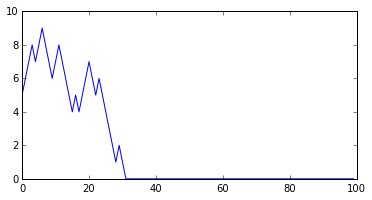

In [355]:
plt.figure(figsize=(6,3));
plt.ylim(0,10)
plt.plot(x);

In [5]:
def BDMC(x0,N=100,nsteps=1000):
    x = np.zeros(nsteps)
    x[0] = x0
    for t in range(nsteps - 1):
        if 0 < x[t] < N:
           if (np.random.rand()>0.5):
              x[t+1] = x[t]+1
           else:
              x[t+1] = x[t]-1
        else:
           x[t+1] = x[t]
    plt.figure(figsize=(6,3));
    plt.ylim(0,np.max(x)+5)
    plt.plot(x);
    return x

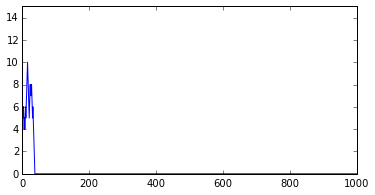

In [6]:
y=BDMC(4,N=1000)

Now, we will simulate many independent trials of this Markov chain. We could run the previous simulation with a loop, but it would be very slow (two nested for loops). Instead, we vectorize the simulation by considering all independent trials at once. There is a single loop over time. At every time step, we update all trials simultaneously with vectorized operations on vectors. The vector **x** now contains the initial position of all trials, at a particular time. At initialization time, the initial positions are set to random numbers between 0 and $N$.

In [7]:
# generated initial positions of all trials
ntrials = 100
x = np.random.randint(size=ntrials, 
                      low=0, high=N+1)
x

array([ 4,  3,  3,  9,  2,  9,  9,  1,  4,  2,  5,  1,  4,  6,  6,  7,  5,
        2,  3,  5,  8,  0,  9,  8,  1,  4,  4, 10,  5,  4, 10, 10,  7,  3,
        9,  7,  8,  0,  3,  0,  3,  1,  5,  2,  2,  2,  7,  7,  3,  7,  4,
        1,  1,  3, 10, 10,  7,  7,  5,  9,  2,  8,  6,  8,  9,  0,  0,  6,
       10,  3, 10,  7,  1,  4,  9,  1,  2, 10,  8,  5,  7,  5,  2,  2,  8,
        0,  6,  6,  2,  0,  6,  4,  7,  8,  1,  9,  7,  0,  1,  7])

In [21]:
def simulate(x, nsteps):
    """Run the simulation."""
    for _ in range(nsteps - 1):
        # Which trials to update?
        upd = (0 < x) & (x < N)
        # In which trials go right
        right = 1*(np.random.rand(ntrials)>0.5)
        # In which trialsgo left
        left = 1*(np.random.rand(ntrials)<0.5)
        # We update position for all trials.
        x[upd] += right[upd] - left[upd]
    return x    

In [33]:
bins = np.linspace(0, N, 25);

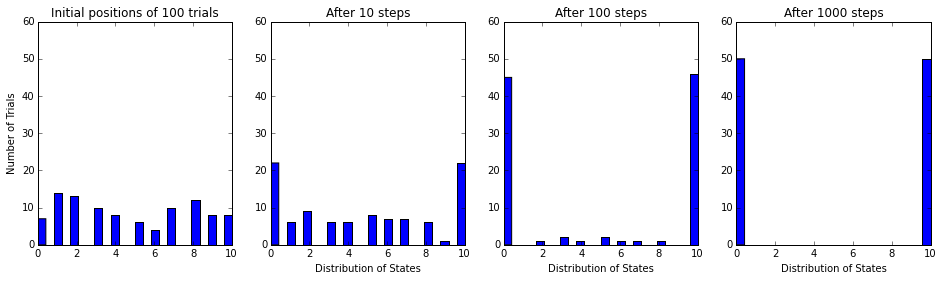

In [47]:
plt.figure(figsize=(16,4));
nsteps_list = [10,100,1000]
x = np.random.randint(size=ntrials, 
                      low=0, high=N+1)
z=x/ntrials
plt.subplot(1, len(nsteps_list)+1, 1);
plt.hist(x, bins=bins);
plt.title("Initial positions of 100 trials");
plt.xlim(0,10)
plt.ylim(0,60)
plt.ylabel("Number of Trials");
for i, nsteps in enumerate(nsteps_list):
    plt.subplot(1, len(nsteps_list)+1, i + 2);
    y=simulate(x, nsteps)
    plt.hist(y, bins=bins);
    #plt.step(x)
    plt.xlim(0,10)
    plt.ylim(0,60)
    plt.xlabel("Distribution of States");
    #if i == 0:
    #    plt.ylabel("number of trials");
    plt.title("After {0:d} steps".format(nsteps));

Eventually, drunkward (  &nbsp;  &nbsp;   &nbsp;   &nbsp;    ).